In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("data.csv")
X = df.drop('Output', axis = 1)
Y = df['Output']
print(X)
print()
print(Y)

   X  Y
0  2  4
1  4  2
2  4  4
3  4  6
4  6  4
5  6  2

0    0
1    0
2    1
3    1
4    0
5    1
Name: Output, dtype: int64


['y', 'y', 'b', 'b', 'y', 'b']


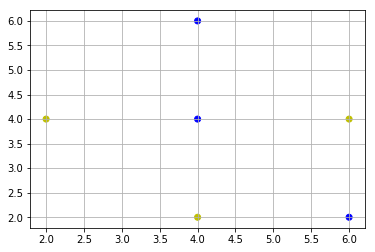

In [80]:
color = []
Y = np.array(Y)
for val in Y :
    if val == 0 :
        color.append('y')
    else :
        color.append('b')
print(color)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color = color)
plt.grid()
plt.show()

In [102]:
x_input = int(input("Enter x value : "))
y_input = int(input("Enter y value : "))

point = np.array([[x_input, y_input]])

k_neighbours = 3

Enter x value : 2
Enter y value : 6


Point is :  [[2 6]]
[1]
Predicted Class :  blue


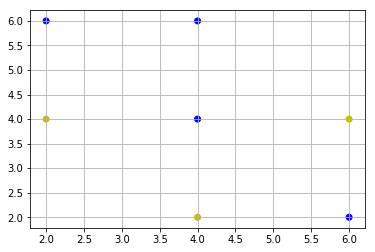

In [103]:
## Implementation using Sklearn


from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = k_neighbours, weights = "distance")
model.fit(X, Y)
print("Point is : ", point)
pred = model.predict(point)
print(pred)
if pred == 0 :
    point_class = "yellow"
    point_color = "y"
else :
    point_class = "blue"
    point_color = "b"
print("Predicted Class : ", point_class)
X_temp = X.copy()
X_temp.loc[X.shape[0]] = [x_input, y_input]
color_temp = color.copy()
color_temp.append(point_color)

plt.scatter(X_temp.iloc[:, 0], X_temp.iloc[:, 1], color = color_temp)
plt.grid()
plt.show()

In [109]:
# # Custom implementation


import heapq, math

def distance(a, b, k) :
#     return np.power(np.sum(np.power(np.abs(a - b), k)), 1 / k)
    return pow( ( pow(a[0] - b[0], k) + pow(a[1] - b[1], k) ), 1 / k )


class KNN :
    def __init__(self, k = 3, weights = "distance", distance_method = "general", p = 2) :
        self.k = k
        self.weights = weights
        self.metric = distance_method
        self.power = p
        self.x = None
        self.y = None
        
        
    def getneighbours(self, X) :
        dist = []
        for i in range (len(self.x)) :
            dist.append( ( distance(self.x[i], X, self.power), i ) )
        heapq.heapify(dist)
        return heapq.nsmallest(self.k, dist)
    
            
    def give_instance(self, X) :
        class_freq = dict()
        dist = self.getneighbours(X)
#         print(dist)
        weights = {}
        if self.weights == 'uniform' :
            weights = { val[1] : 1 for val in dist }
        else :
            for val in dist :
                if val[0] > 0 :
                    weights[val[1]] = (1 / (val[0] * 1.0))
                else :
                    return self.y[val[1]]
                
        total = sum(weights.values())
        
        for val in dist :
            op_class = self.y[val[1]]
            if op_class in class_freq :
                class_freq[op_class] += weights[val[1]] * 1.0
            else :
                class_freq[op_class] = weights[val[1]] * 1.0
                
        final_class = None
        max_freq = -10 ** 18
        for key, value in class_freq.items() :
            if max_freq < (value / total * 1.0) :
                final_class = key
                max_freq = (value / total * 1.0)
        return final_class
            
        
    def fit(self, x, y) :
        self.x = x
        self.y = y
        
        
    def predict(self, X) :
        Y_Pred = np.array([self.give_instance(i) for i in X])
        return Y_Pred

[(2.0, 0), (2.0, 3), (2.8284271247461903, 2)]
point is :  [[2 6]]
[1]
Predicted Class :  blue


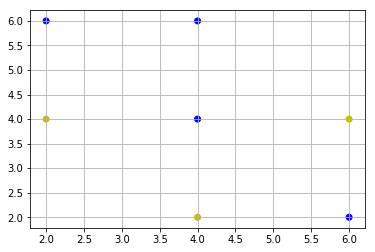

In [110]:
model = KNN()
model.fit(np.array(X), np.array(Y))
# print(point)
pred = model.predict(point)
print("point is : ", point)
print(pred)

if pred == 0 :
    point_class = "yellow"
    point_color = "y"
else :
    point_class = "blue"
    point_color = "b"
print("Predicted Class : ", point_class)
X_temp = X.copy()
X_temp.loc[X.shape[0]] = [x_input, y_input]
color_temp = color.copy()
color_temp.append(point_color)

plt.scatter(X_temp.iloc[:, 0], X_temp.iloc[:, 1], color = color_temp)
plt.grid()
plt.show()